#### Задача 1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [228]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [229]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [230]:
#Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [231]:
# Функция, реализовывающая предсказание в градиентном бустинге

def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [232]:
# Функция для расчета среднеквадратичной ошибки
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y - z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z - y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [233]:
def residual(y, z):
    return - (z - y)

In [234]:
# Реализуем функцию для обучения градиентного бустинга

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

**Построим график зависимости величины ошибки от количества деревьев. Сделаем вывод**

Кол-во деревьев: 1, Ошибка на тренировочных данных: 29408.21151710595
Кол-во деревьев: 1, Ошибка на тестовых данных: 25999.082381310087

Кол-во деревьев: 10, Ошибка на тренировочных данных: 25021.522483897552
Кол-во деревьев: 10, Ошибка на тестовых данных: 22083.14372312582

Кол-во деревьев: 30, Ошибка на тренировочных данных: 17671.440043333867
Кол-во деревьев: 30, Ошибка на тестовых данных: 15540.279799154143

Кол-во деревьев: 50, Ошибка на тренировочных данных: 12717.945994164065
Кол-во деревьев: 50, Ошибка на тестовых данных: 11180.090160019678

Кол-во деревьев: 70, Ошибка на тренировочных данных: 9375.041527940099
Кол-во деревьев: 70, Ошибка на тестовых данных: 8263.267394263154



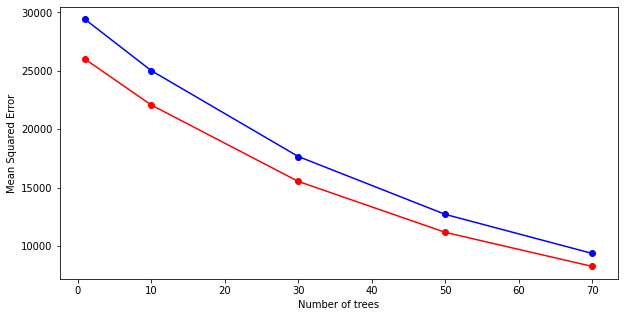

In [235]:
n_trees = [1, 10, 30, 50, 70]
eta = 0.01 # понизила шаг , т к было очень сильное переобучение
max_depth = 3
mean_train_errors = []
mean_test_errors = []

for n in n_trees:
    trees, train_errors, test_errors = gb_fit(n, max_depth, X_train, X_test, y_train, y_test, eta)
    
    train_prediction = gb_predict(X_train, trees, eta)
    mean_train_error = mean_squared_error(y_train, train_prediction)
    
    print(f'Кол-во деревьев: {n}, Ошибка на тренировочных данных: {mean_train_error}')
    mean_train_errors.append(mean_train_error)
    
    test_prediction = gb_predict(X_test, trees, eta)
    mean_test_error = mean_squared_error(y_test, test_prediction)
    
    print(f'Кол-во деревьев: {n}, Ошибка на тестовых данных: {mean_test_error}\n')
    mean_test_errors.append(mean_test_error)
      
          
plt.figure(figsize = (10,5))
plt.plot(n_trees, mean_train_errors, 'bo-')
plt.plot(n_trees, mean_test_errors, 'ro-')

plt.xlabel('Number of trees')
plt.ylabel('Mean Squared Error')

plt.show()

Вывод: очевидно снижение величины ошибки с ростом количества деревьев в ансамбле

**Построим график зависимости величины ошибки от максимальной глубины деревьев. Сделаем вывод**

Макс. глубина: 1, Ошибка на тренировочных данных: 13544.954750094801
Макс. глубина: 1, Ошибка на тестовых данных: 11448.027974715675

Макс. глубина: 3, Ошибка на тренировочных данных: 12717.945994164065
Макс. глубина: 3, Ошибка на тестовых данных: 11180.090160019678

Макс. глубина: 5, Ошибка на тренировочных данных: 12158.65503105498
Макс. глубина: 5, Ошибка на тестовых данных: 11060.905429008151

Макс. глубина: 7, Ошибка на тренировочных данных: 11634.169012406828
Макс. глубина: 7, Ошибка на тестовых данных: 11109.417910226291

[13544.954750094801, 12717.945994164065, 12158.65503105498, 11634.169012406828]


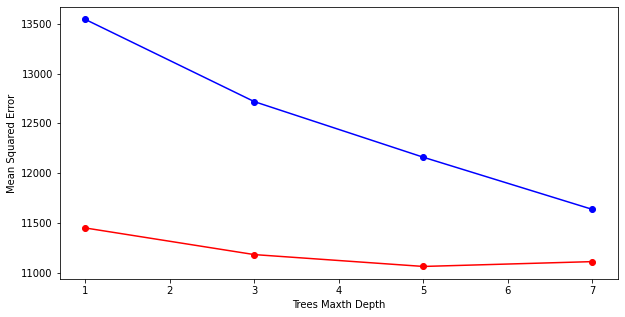

In [236]:
n_trees = 50
eta = 0.01 # понизила шаг , т к было очень сильное переобучение
max_depth = [1, 3, 5, 7]
mean_train_errors1 = []
mean_test_errors1 = []

for depth in max_depth:
    trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, eta)
    
    train_prediction = gb_predict(X_train, trees, eta)
    mean_train_error1 = mean_squared_error(y_train, train_prediction)
    print(f'Макс. глубина: {depth}, Ошибка на тренировочных данных: {mean_train_error1}')
    mean_train_errors1.append(mean_train_error1)
    
    test_prediction = gb_predict(X_test, trees, eta)
    mean_test_error1 = mean_squared_error(y_test, test_prediction)
    print(f'Макс. глубина: {depth}, Ошибка на тестовых данных: {mean_test_error1}\n')
    mean_test_errors1.append(mean_test_error1)
      
print(mean_train_errors1)
        
plt.figure(figsize = (10,5))
plt.plot(max_depth, mean_train_errors1, 'bo-')
plt.plot(max_depth, mean_test_errors1, 'ro-')

plt.xlabel('Trees Maxth Depth')
plt.ylabel('Mean Squared Error')

#plt.ylim(25000, 30000)

plt.show()

Вывод: максимальная глубина - гиперпараметр, который необходимо аккуратно ограничивать во избежание переобучение. На графике видно, что оптимальная глубина = 3, значения выше этого дают значения ошибки на тесте выше, а на тренировочных данных ошибка продолжает снижаться, что говорит о переобучении.

#### Задача 2*. *Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [237]:
import random

In [238]:
# Реализуем функцию обучения стохастического градиентного бустинга

def stohastic_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, border):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        # Выделим выборку для обучения дерева, выделив случайные индексы в размере border
        new_sample_indeces = np.random.randint(X_train.shape[0], size = int(X_train.shape[0]*border))
        X_sample_for_fit = X_train[new_sample_indeces]
        y_sample_for_fit = y_train[new_sample_indeces]

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_sample_for_fit, y_sample_for_fit)
            
            #Ошибки находим на всей выборке
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг (отклонение от истины)
            tree.fit(X_sample_for_fit, residual(y_train, target)[new_sample_indeces])
            
            # Ошибки находим на всей выборке 
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors
    

In [239]:
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.01

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [240]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [241]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 12717.945994164065
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 11180.090160019678


**Рассчитаем значение ошибки при аналогичных параметрах, используя стохастический градиентный спуск**

In [242]:
trees1, train_errors1, test_errors1 = stohastic_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, 
                                                       border = 0.5)

In [243]:
evaluate_alg(X_train, X_test, y_train, y_test, trees1, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 12678.425797455084
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 10911.175093926906


Ошибка на стохастическом градиентном бустинге примерно такая же, как на классическом 

#### Задача 3*. Оптимизировать процесс обучения градиентного бустинга, чтобы он занимал меньше времени.

In [268]:
# Функция, реализовывающая предсказание в градиентном бустинге

def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     prediction = 0
#     for alg in trees_list:
#         prediction += eta * alg.predict(X)
#     predictions += prediction
        
    predictions = np.array(
        sum([eta * alg.predict(X) for alg in trees_list])
    )
    return predictions

In [269]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [270]:
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.01
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

# Ошибки были 12119, 13009

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 12717.945994164065
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 11180.090160019678
